<a href="https://colab.research.google.com/github/abitalibsg/intelunnati_Robosapians/blob/main/Copy_of_Clustering_using_Kmeans_Final_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Adding various required libraries
from ast import increment_lineno
import pandas as pd
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Code for reading the csv file containing the data
df = pd.read_csv("/content/Kerala Blackspots with nearest hospitals finalised dataset (csv) (2).csv")
df.head()

,Sl. No.,Name of District,Name of Police Station,Name of Landmark,Name of Location,Lattitude,Longitude,Name of Road,HOSPITAL NEAR LATITUDE,HOSPITAL NEAR LONGITUDE,Accident Severity Index,Type of Road,Number of Fatalities,Sum of Fatal & Grievous Injury Crashes
0,1,Thiruvananthapuram,Karamana,Pappanamcode Mosque - Kerala Gramin Bank,Pappanamcode Junction,8.470460,76.980803,National Highway 66 (NH 66),8.724141,77.028555,366,NH,15,102
1,2,Kollam,Chavara PS,Regent Lake Palace - 110m before Hindustan Pet...,Parimanam Temple,8.954698,76.534274,National Highway 66 (NH 66),8.955805,76.534519,357,NH,17,99
2,3,Thiruvananthapuram,CITY TRAFFIC,Tax Towers - Karamana Junction,Karamana Junction,8.482015,76.967072,National Highway 66 (NH 66),8.481656,76.963152,314,NH,8,94
3,4,Malappuram,KUTTIPURAM,Vyapara Bhavan - 200m after Highway Junction,Kuttipuram Highway Junction,10.842810,76.030021,National Highway 66 (NH 66),10.854681,76.037121,306,NH,12,86
4,5,Thiruvananthapuram,Balaramapuram,Kodinada Junction - Indian Oil Petrol Pump,Balaramapuram Junction,8.430501,77.046417,National Highway 66 (NH 66),8.426988,77.043805,300,NH,6,92


In [4]:
#Assigning columns "Accident Severity Index","Number of Fatalities", "Sum of Fatal & Grievous Injury Crashes" to a variable 'z'
z = df[["Accident Severity Index","Number of Fatalities", "Sum of Fatal & Grievous Injury Crashes"]]

#Printing z
z.head()


,Accident Severity Index,Number of Fatalities,Sum of Fatal & Grievous Injury Crashes
0,366,15,102
1,357,17,99
2,314,8,94
3,306,12,86
4,300,6,92


Below 3 lines of code is for finding the optimum number of clusters using Elbow method.

In [5]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(z)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [6]:
model.inertia_


9715.45237040134

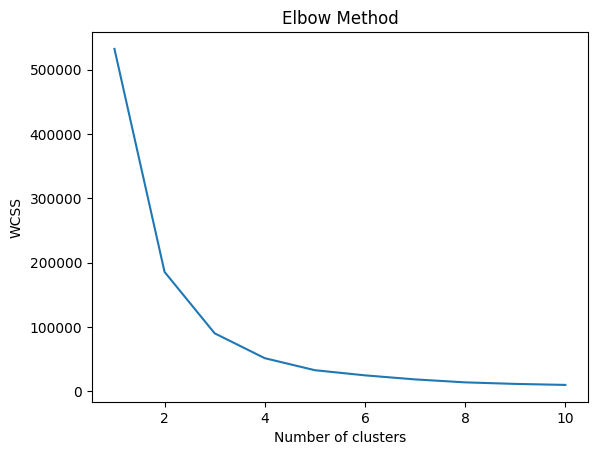

In [7]:
#Plotting it into the Elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Therefore the optimum number of clusters is 3 from the Elbow graph


In [8]:
#Clustering the data into 3 clusters
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
df['y'] = y_kmeans

In [10]:
#Downloading the data to be clustered
df.to_csv("final_data_with_cluster.csv")

In [11]:
#Printing data to be mapped with k means variable 'y'
df.head()

,Sl. No.,Name of District,Name of Police Station,Name of Landmark,Name of Location,Lattitude,Longitude,Name of Road,HOSPITAL NEAR LATITUDE,HOSPITAL NEAR LONGITUDE,Accident Severity Index,Type of Road,Number of Fatalities,Sum of Fatal & Grievous Injury Crashes,y
0,1,Thiruvananthapuram,Karamana,Pappanamcode Mosque - Kerala Gramin Bank,Pappanamcode Junction,8.470460,76.980803,National Highway 66 (NH 66),8.724141,77.028555,366,NH,15,102,1
1,2,Kollam,Chavara PS,Regent Lake Palace - 110m before Hindustan Pet...,Parimanam Temple,8.954698,76.534274,National Highway 66 (NH 66),8.955805,76.534519,357,NH,17,99,1
2,3,Thiruvananthapuram,CITY TRAFFIC,Tax Towers - Karamana Junction,Karamana Junction,8.482015,76.967072,National Highway 66 (NH 66),8.481656,76.963152,314,NH,8,94,1
3,4,Malappuram,KUTTIPURAM,Vyapara Bhavan - 200m after Highway Junction,Kuttipuram Highway Junction,10.842810,76.030021,National Highway 66 (NH 66),10.854681,76.037121,306,NH,12,86,1
4,5,Thiruvananthapuram,Balaramapuram,Kodinada Junction - Indian Oil Petrol Pump,Balaramapuram Junction,8.430501,77.046417,National Highway 66 (NH 66),8.426988,77.043805,300,NH,6,92,1


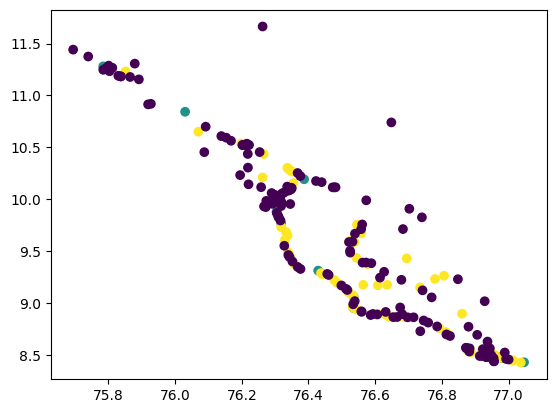

In [12]:
#Creating clusters
plt.scatter(df['Longitude'], df['Lattitude'],c=df['y'],)

below 3 lines are for categorising and grouping the locations based on (low,moderate and high)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df['y'] = pd.Categorical(df.y)
df.y.value_counts()

0    153
2     69
1     16
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

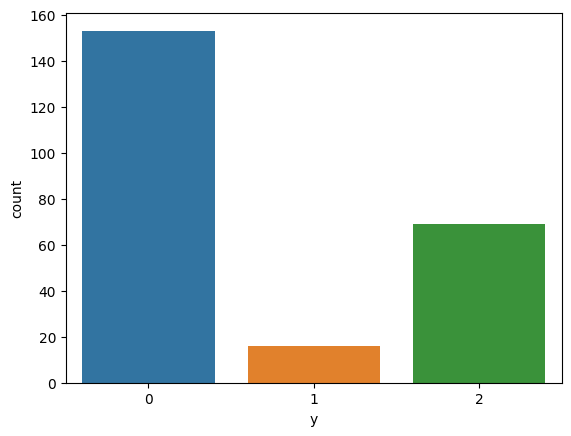

In [15]:
sns.countplot(x ='y', data = df)

In [16]:
#Below codes are for deviding the clusters into 3 groups (cluster1,cluster2 and cluster3)
cluster1 = df[['Lattitude', "Longitude"]][df['y'] == 0].values.tolist()
cluster2 = df[['Lattitude', "Longitude"]][df['y'] == 1].values.tolist()
cluster3 = df[['Lattitude', "Longitude"]][df['y'] == 2].values.tolist()


In [17]:
#Printing the Kerala state openstreet map
kerala_map = folium.Map(location=[10.8505, 76.2711], zoom_start=8,tiles = "openstreetmap")
kerala_map

Below is the code for embedding or mapping the clusters into street map of kerala

In [18]:
#for embedding or mapping the clusters into openstreet map of kerala
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(kerala_map)

for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(kerala_map)

for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(kerala_map)

In [19]:
#Printing the map
kerala_map